###  MicroGrad demo

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [4]:
np.random.seed(1337)
random.seed(1337)

[(array([ 1.88101391e+00, -1.16515726e-03]), np.int64(1)), (array([-0.13978292,  1.144623  ]), np.int64(0)), (array([-0.87027504,  0.21431305]), np.int64(0)), (array([ 0.07525312, -0.1572997 ]), np.int64(1)), (array([ 1.758169 , -0.0654567]), np.int64(1)), (array([ 0.58961949, -0.54314258]), np.int64(1)), (array([ 1.1745536 , -0.37440299]), np.int64(1)), (array([ 1.55717533e+00, -1.45351957e-03]), np.int64(1)), (array([ 0.55101677, -0.35469872]), np.int64(1)), (array([ 1.30772759, -0.35948564]), np.int64(1)), (array([1.84297393, 0.0966278 ]), np.int64(1)), (array([-0.84666874,  0.43388322]), np.int64(0)), (array([ 1.03844059, -0.66505615]), np.int64(1)), (array([2.07264872, 0.18531534]), np.int64(1)), (array([0.41300349, 0.85233026]), np.int64(0)), (array([0.39176231, 0.75324526]), np.int64(0)), (array([2.09362901, 0.42955371]), np.int64(1)), (array([-0.76122137,  0.63808421]), np.int64(0)), (array([0.11491   , 0.93717396]), np.int64(0)), (array([0.80428525, 0.69692889]), np.int64(0)),

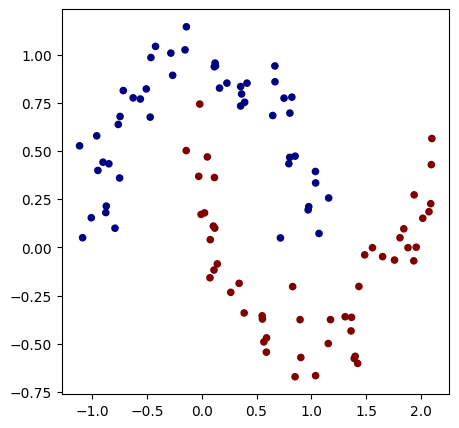

In [20]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
print(list(zip(X, y)))
y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [11]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [25]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]

    print(len(Xb))
    print(Xb)
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    print(inputs)
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)


100
[[ 1.88101391e+00 -1.16515726e-03]
 [-1.39782923e-01  1.14462300e+00]
 [-8.70275040e-01  2.14313054e-01]
 [ 7.52531198e-02 -1.57299703e-01]
 [ 1.75816900e+00 -6.54567021e-02]
 [ 5.89619488e-01 -5.43142576e-01]
 [ 1.17455360e+00 -3.74402988e-01]
 [ 1.55717533e+00 -1.45351957e-03]
 [ 5.51016769e-01 -3.54698720e-01]
 [ 1.30772759e+00 -3.59485643e-01]
 [ 1.84297393e+00  9.66278034e-02]
 [-8.46668744e-01  4.33883215e-01]
 [ 1.03844059e+00 -6.65056154e-01]
 [ 2.07264872e+00  1.85315341e-01]
 [ 4.13003491e-01  8.52330258e-01]
 [ 3.91762314e-01  7.53245264e-01]
 [ 2.09362901e+00  4.29553711e-01]
 [-7.61221370e-01  6.38084211e-01]
 [ 1.14909996e-01  9.37173960e-01]
 [ 8.04285249e-01  6.96928887e-01]
 [ 8.51323720e-01 -6.70863165e-01]
 [ 5.53843397e-01 -3.71388059e-01]
 [ 1.16060562e-01  3.62644567e-01]
 [ 6.67275371e-01  9.41373420e-01]
 [ 3.55015759e-01  7.33715048e-01]
 [ 1.15402200e+00 -4.98425441e-01]
 [ 2.09881996e+00  5.65061813e-01]
 [ 6.47638289e-01  6.84305873e-01]
 [ 2.29900143e-0

In [19]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 1.0361316298805092, accuracy 55.00000000000001%
step 1 loss 3.381228173613171, accuracy 65.0%
step 2 loss 1.1209593672118843, accuracy 50.0%
step 3 loss 0.4061751358088215, accuracy 83.0%
step 4 loss 0.3238032648116146, accuracy 83.0%
step 5 loss 0.2933798019081227, accuracy 86.0%
step 6 loss 0.28096652996433663, accuracy 87.0%
step 7 loss 0.29055036983995564, accuracy 88.0%
step 8 loss 0.26281715484224444, accuracy 87.0%
step 9 loss 0.24049115368344662, accuracy 88.0%
step 10 loss 0.23805199200389454, accuracy 89.0%
step 11 loss 0.23624191773607767, accuracy 94.0%
step 12 loss 0.24230736060357652, accuracy 90.0%
step 13 loss 0.2133305480275289, accuracy 92.0%
step 14 loss 0.20602161041014133, accuracy 92.0%
step 15 loss 0.21716566263791953, accuracy 94.0%
step 16 loss 0.2179942876812771, accuracy 92.0%
step 17 loss 0.19010316838130953, accuracy 94.0%
step 18 loss 0.21907911064552124, accuracy 91.0%
step 19 loss 0.28303516017089925, accuracy 87.0%
step 20 loss 0.23905006296

(-1.6660307065712348, 2.0839692934287655)

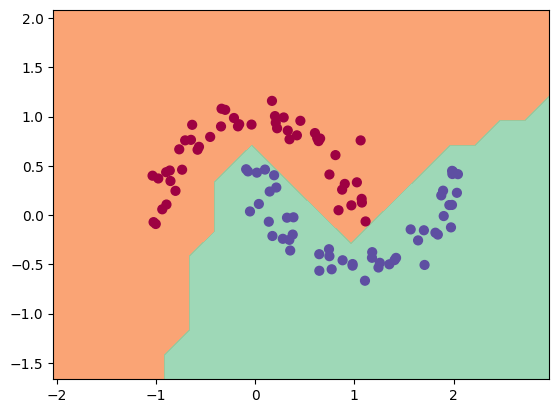

In [20]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
